# Homework #3

**See Canvas for this assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## A. Theoretical Problems

### A.1 Jefferys' prior

Let $X_1,...,X_n \overset{iid}{\sim} \Gamma(1,\lambda)$.

**A.1 (a) [10 points] Derive the Jeffreys' prior for $\lambda$.**

The likelihood is given by:

\begin{align*}
f(x\, | \, \alpha = 1, \lambda) =   \lambda e^{-\lambda x} &\implies f(\mathbf{x}\, | \, \alpha = 1, \lambda) =  \lambda^ne^{-\lambda n\bar{x}} \implies \log f(x\, | \, \alpha = 1, \lambda) = n\log(\lambda) - \lambda n\bar{x} \\
&\implies \frac{d^2\log f(x\, | \, \lambda)}{d\lambda^2} = -\frac{n}{\lambda^2}
\end{align*}

Thus, 

\begin{align*}
I(\lambda) = -E\left(\frac{d^2\log f(x\, | \, \lambda)}{d\lambda^2}\right) = -E\left(-\frac{n}{\lambda^2}\right) = \frac{n}{\lambda^2}.
\end{align*}

So, the Jefferys' prior is $\pi(\lambda) = \frac{\sqrt{n}}{\lambda}$.

**A.1 (b) [2 points] Is the prior proper?**

It does not integrate to 1 on $\lambda \in (0,\infty)$.

**A.1 (c) [10 points] Derive the posterior and give conditions on $\mathbf{X} = (X_1,...,X_n)^T$ to ensure it is proper.**

\begin{align*}
\pi(\lambda \, | \, \mathbf{x}) \propto f(\mathbf{x} \, | \, \lambda)\pi(\lambda) = \lambda^ne^{-\lambda n \bar{x}}\frac{\sqrt{n}}{\lambda} = \sqrt{n}\lambda^{n-1}e^{-\lambda n \bar{x}} 
\end{align*}

The posterior is $\lambda \, | \, \mathbf{x} \sim \Gamma(n,n\bar{x})$. This will always be a proper distribution.

[1] 1.094564e-30

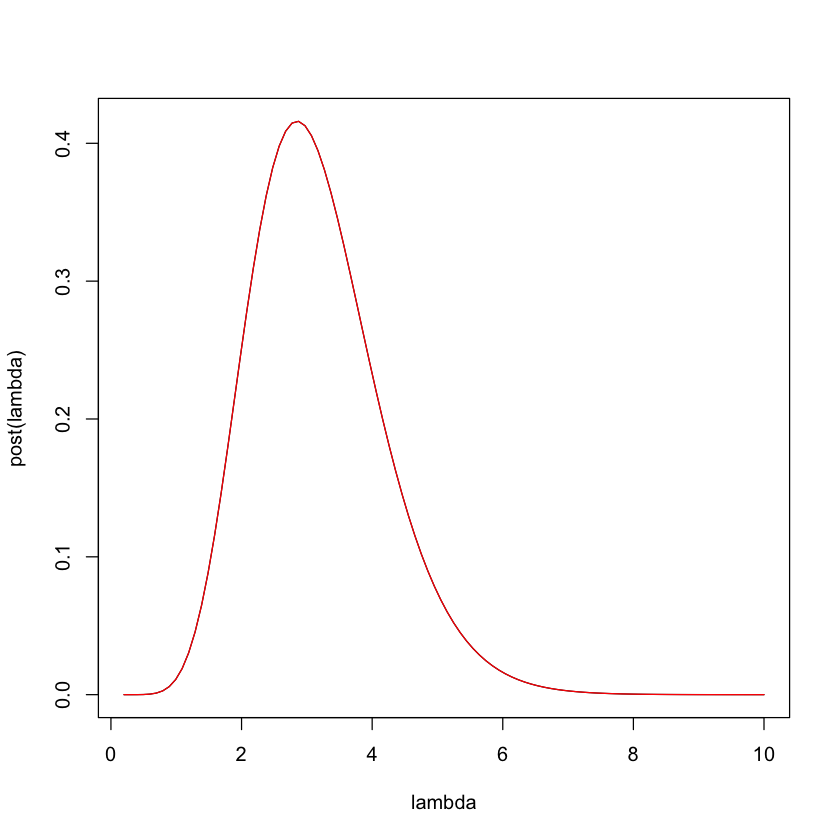

In [1]:
#simulation check
set.seed(8818)
m = 100; lambda = seq(0.2,10,length.out = m)

#simulated data
n = 10
x = rgamma(n,1,3)
#prior
J = function(lambda){
    J = sqrt(n)/lambda
    return(J)
}

#posterior gamma(n,n*xbar)
post = function(lambda){
    post = dgamma(lambda,n,n*mean(x))
    return(post)
}


#formula from above with normalizing constant
post2 = function(lambda){
    post2 = (sum(x))^n/factorial(n-1)*lambda^(n-1)*exp(-sum(x)*lambda) 
    return(post2)
}

plot(lambda, post(lambda), type = "l")
lines(lambda,post2(lambda), col = "red")

sum((post(lambda) - post2(lambda))^2)

### A.2 Invariance

Consider $X_1,...,X_n \overset{iid}{\sim} binomial(1,p)$ with $p$ unknown. Imagine that one data scientist represents their prior ignorance on $p$ using $p \sim beta(1,1)$, i.e., a flat prior. But another data scientist wonders whether that prior ignorance translates to prior ignorance about the ultimate parameter of interest, $\phi = \log\left(\frac{p}{1-p}\right)$.

**A.2 (a) [15 points] Let $p \sim beta(1,1)$. Derive the pdf of $\phi = \log\left(\frac{p}{1-p}\right)$. HINT: Start by finding the cdf of $\phi$.**

\begin{align*}
F_\phi(y) &= P(\phi \le y) = P\left( \log\left(\frac{p}{1-p}\right)\le y\right)= P\left( \frac{p}{1-p}\le e^y\right) \\
&= P\left( \frac{1-p}{p}\ge e^{-y}\right) = P\left( \frac{1}{p}-1\ge e^{-y}\right) = P\left( \frac{1}{p}\ge e^{-y} + 1\right) \\
&= P\left( p\le \frac{1}{e^{-y} + 1}\right) = \frac{1}{e^{-y} + 1}.
\end{align*}

The last equality holds because $p \sim U(0,1)$ which has cdf $F(p) = pI_{(0,1)}(p) + I_{(1,\infty)}(p)$.

$F_\phi(y) = \frac{1}{e^{-y} + 1}$ is the cdf of the logistic with parameters $\alpha = 0$, $\beta = 1$. 

**A.2 (b) [8 points] Plot the density for $\phi = \log\left(\frac{p}{1-p}\right)$. Does ignorance about $p$ translate to ignorance about $\phi$?**

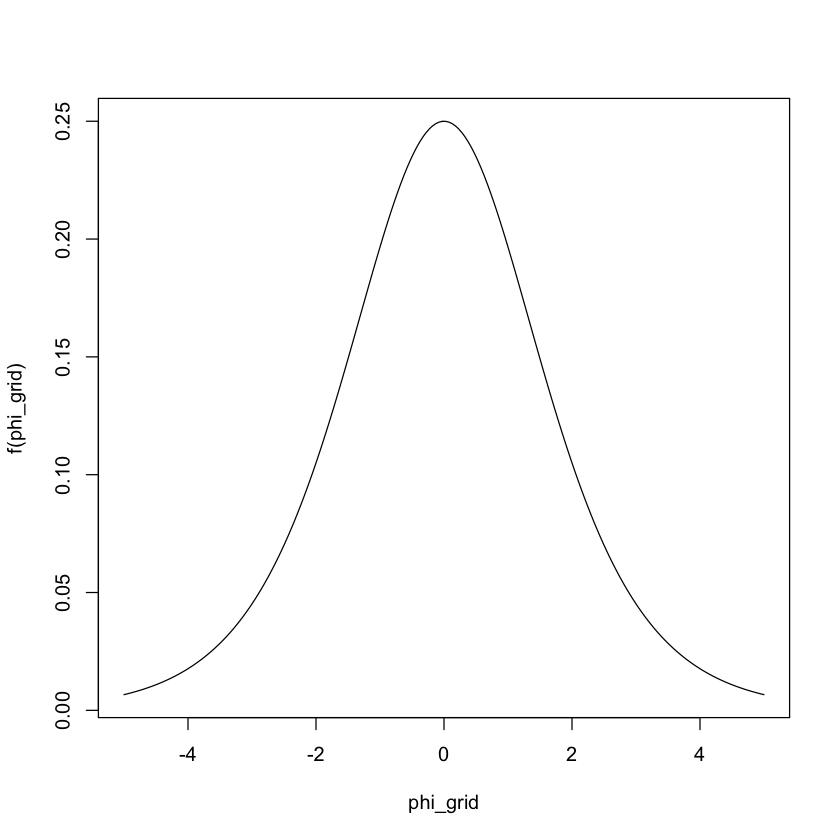

In [2]:
p_grid = seq(0,1,length.out = 200)
prior = dbeta(p_grid,1,1)
f = function(p){
    f = exp(-p)/(exp(-p) + 1)^2
    return(f)
}
phi_grid = seq(-5,5,length.out = 200)
plot(phi_grid,f(phi_grid), type = "l")

### A.3 The invariance of Jefferys' prior

Let $X_1,...,X_n \overset{iid}{\sim}f(\mathbf{x} \, | \, \theta)$ with associated Fisher information number $I_\theta(\theta)$. Consider the (continuous, differentiable, invertible) reparameterization according to $\gamma = g(\theta)$. Denote the Fisher information for this reparameterization as $I_\gamma(\gamma)$. 

**A.3 (a) [17 points] Show that**

\begin{align*}
I_\gamma(\theta) = I_\theta(\theta)\left(\frac{d\theta}{d\gamma} \right)^2.
\end{align*}


First, note that, for $\theta = g^{-1}(\gamma)$, 

\begin{align*}
\frac{d\log f(\mathbf{x} \, | \, \theta)}{d\gamma} &= \frac{d\log f(\mathbf{x} \, | \, \theta)}{d\theta}\left(\frac{d\theta}{d\gamma} \right),
\end{align*}

and by the multiplication rule,

\begin{align*}
\frac{d^2\log f(\mathbf{x} \, | \, \theta)}{d\gamma^2} &= \frac{d\log f(\mathbf{x} \, | \, \theta)}{d\theta}\left(\frac{d^2\theta}{d\gamma^2} \right) + \frac{d^2\log f(\mathbf{x} \, | \, \theta)}{d\theta^2}\left(\frac{d\theta}{d\gamma} \right)^2.
\end{align*}

Thus, 

\begin{align*}
I_\gamma(\theta) &= -E\left(\frac{d\log f(\mathbf{x} \, | \, \theta)}{d\theta}\left(\frac{d^2\theta}{d\gamma^2} \right) + \frac{d^2\log f(\mathbf{x} \, | \, \theta)}{d\theta^2}\left(\frac{d\theta}{d\gamma} \right)^2 \right)\\
&= -E\left(\frac{d\log f(\mathbf{x} \, | \, \theta)}{d\theta}\left(\frac{d^2\theta}{d\gamma^2} \right) \right) - E\left(\frac{d^2\log f(\mathbf{x} \, | \, \theta)}{d\theta^2}\left(\frac{d\theta}{d\gamma} \right)^2 \right)\\
&= -\left(\frac{d^2\theta}{d\gamma^2} \right) \underbrace{E\left(\frac{d\log f(\mathbf{x} \, | \, \theta)}{d\theta} \right)}_{=0} \underbrace{- E\left(\frac{d^2\log f(\mathbf{x} \, | \, \theta)}{d\theta^2} \right)}_{I_\theta(\theta)}\left(\frac{d\theta}{d\gamma} \right)^2 \\
&=I_\theta(\theta)\left(\frac{d\theta}{d\gamma} \right)^2.
\end{align*}

**A.3 (b) [5 points] Argue that this implies that the Jeffrey's prior is invariant to transformations.** (Nothing mathematical to do here...)

Evaluating the Jeffreys' prior at the transformed value of the parameter yields the transformation of random variables formula. This implies that the prior is invariant to transformations. The probability assigned to an region of a probability space using a Jeffreys prior will be the same regardless of the parameterization used to define the Jeffreys prior.

### A.4 The Wishart and the $\chi^2$

Let $D = (\mathbf{X}_1,...,\mathbf{X}_n)$ denote a $p\times n$ data matrix with each column $\mathbf{X}_j = (X_1,...,X_p)^T \sim N_p(\boldsymbol 0, \Sigma_p)$ for $j = 1,...,n$. $\Sigma_p$ is an $p \times p$ covariance matrix. Then $M = DD^T$ is a $p\times p$ positive definite matrix and $M \sim W_p(n, \Sigma_p)$, where $\Sigma_p$ is $p \times p$ and positive definite. 

**[12 points] Show that if $p = 1$ and $\Sigma_p = 1$ then $M \sim \chi^2(n)$.**

For $p = 1$, $D = (X_1,...,X_n)$ is $1 \times n$ and 

\begin{align*}
M = DD^T = (X_1,...,X_p)(X_1,...,X_p)^T = \sum^n_{i=1}X_i^2
\end{align*}

Thus, the Wishart distribution becomes:

\begin{align*}
f_M(m) &= \frac{1}{2^{np/2}|\Sigma_p|^{n/2}\Gamma_p(n/2)}\left|M\right|^{(n-p-1)/2}\exp{\left\{-\frac{1}{2}tr\left(\Sigma_p^{-1}M\right) \right\} } \\
&= \frac{1}{2^{n/2}\Gamma(n/2)}M^{(n-1)/2}\exp{\left\{-\frac{1}{2}M \right\} } \\
&= \frac{1}{2^{n/2}\Gamma(n/2)}M^{(n+1)/2 - 1}\exp{\left\{-\frac{1}{2}M \right\} } \\
\end{align*}

which is the pdf of $\chi^2(n)$.

## B. Computational Problems

## B.1 An objective analysis in R

This problem refers to problem A.1.

**B.1 (a) [10 points] Conduct an "objective" Bayesian analysis using the prior and posterior from A.1 and $x = (0.4478, 0.6173, 1.1317, 0.9011, 1.9250)$. That is, compute the posterior distribution for the data and prior above.**

Use R functions for your answer; this will make part (c) easier!

In [3]:
x = c(0.4478, 0.6173, 1.1317, 0.9011, 1.9250); n = length(x); 

#prior
m = 200; lambda = seq(0.1,2,length.out = m)
prior = n/lambda^2


#numerator of Bayes
f = function(lambda){
    f = n*lambda^(n-2)*exp(-lambda*n*mean(x))
    return(f)
}

#posterior
posterior = function(lambda){
    posterior = f(lambda)/integrate(f,0,Inf)$val
    return(posterior)
    }

**B.1 (b) [7 points] Plot the prior and posterior distributions. (You may want to multiply the prior by a constant so that you can visualize it with the posterior...why is this necessary??)**

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


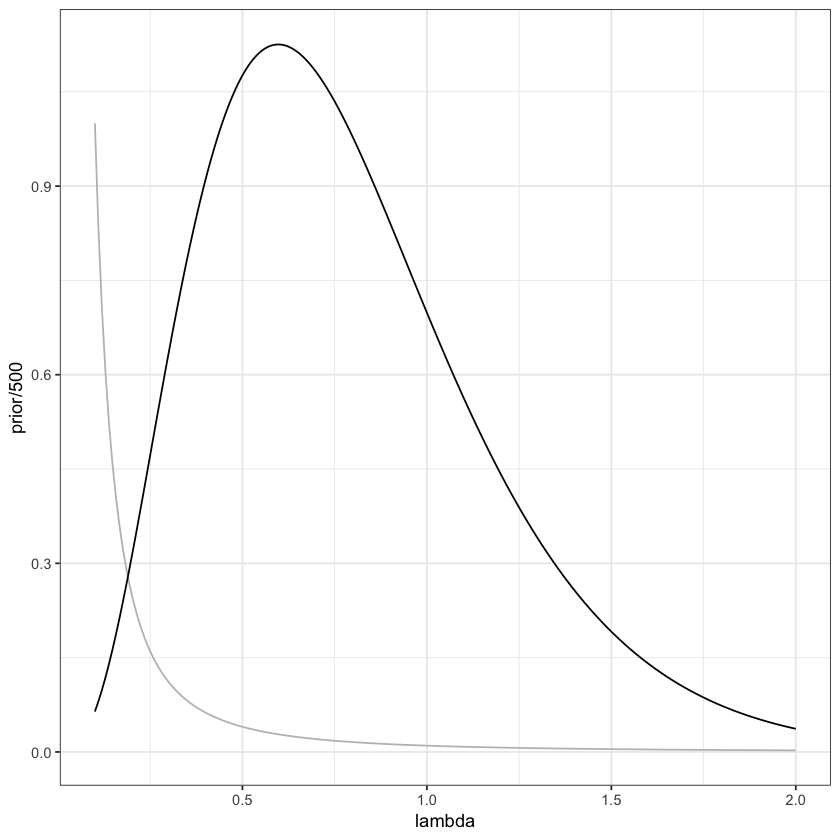

In [4]:
library(ggplot2)

m = 200; lambda = seq(0.1,2,length.out = m)
prior = n/lambda^2

df = data.frame(lambda, prior, posterior = posterior(lambda))
ggplot(df) + 
    geom_line(aes(x = lambda, y = prior/500), col = "gray") +
    geom_line(aes(x = lambda, y = posterior)) +
    theme_bw()


**B.1 (c) [4 points] Numerically verify that the posterior is proper.**

In [5]:
integrate(posterior,0,Inf)

1 with absolute error < 3.2e-07

### B.2 (STAT 5630 Only) Inference on the variance-covariance matrix

Let $\mathbf{X}_1, \mathbf{X}_2 ,...,\mathbf{X}_{10}$ each be vectors of length $p = 4$ that are distributed as multivariate normal. For $i=1,...,10$, $E(\mathbf{X}_i) = \boldsymbol{\mu}_i = (0,0,0,0,0)^T$ and $Var(\mathbf{X}_i) = \boldsymbol\Sigma_p$ is the $p \times p$ variance-covariance matrix. We'd like to estimate $\boldsymbol\Sigma_p$.

**B.2 (a) [3 points] Write an R function that computes an inverse Wishart pdf, to serve as the prior distribution for a Bayesian analysis. Let the prior parameters be $R \approx 0$ (e.g., a diagonal matrix with diagonal entries random numbers just above zero), and $v = p = 4$.**

In [6]:
#prior
library(LaplacesDemon)
library(CholWishart)
set.seed(11)
p = 4
R = diag(runif(1,0,0.1),nrow = p);  
v = p;
prior2 = function(S){
    prior = dinvwishart(S, v, R)
    return(prior)
}

prior2(R)


[1] 40447273432

**B.2.(b) [3 points] Use the data below, in the matrix `X`, to write an R function that computes the likelihood of the data $X$, given $\Sigma_p$.** 

In [7]:
set.seed(11)
library(MASS)
n = 10; p = 4

# create the variance covariance matrix
sigma = rbind(c(1,-0.8,-0.7, -0.1), c(-0.8,1, 0.3, 0.3), 
              c(-0.7,0.3,1,0.4),c(-0.1,0.3,0.4, 1)); sigma

# create the mean vector
mu = c(0,0,0,0) 
# generate the multivariate normal distribution
X = t(mvrnorm(n=n, mu=mu, Sigma=sigma))

D = X

1.0,-0.8,-0.7,-0.1
-0.8,1.0,0.3,0.3
-0.7,0.3,1.0,0.4
-0.1,0.3,0.4,1.0


In [8]:
#likelihood
W = matrix(0, nrow = p, ncol = p)

for (i in 1:n){
    W = W + X[,i]%*%t(X[,i])
}


l = function(S){
    l = det(S)^(-n/2)*exp(-1/2*sum(diag(W%*%solve(S))))
    return(l)
}

l(sigma)

[1] 2678.673

**B.2 (c) [3 points] Write an R function that computes the posterior distribution of $\Sigma_p$ given the data $X$.**

In [9]:
posterior = function(S){
    posterior = dinvwishart(S, n+v, R)
    return(posterior)
}

posterior(sigma)

[1] 3.25244e-46

**B.2 (d) [3 points] Compute the posterior mean and compare it to the sample covariance matrix** 

$$C = \left(\sum^n_{i=1}\mathbf{X}_i\mathbf{X}_i^T\right)\bigg/n.$$

**Why is the posterior mean close to $C$?**

In [10]:
post_mu = (W+R)/(n+v-p-1); post_mu; W/n

0.8328643,-0.6989267,-0.7730397,-0.4725961
-0.6989267,0.6707387,0.5472015,0.3675873
-0.7730397,0.5472015,1.0262093,0.7766616
-0.4725961,0.3675873,0.7766616,0.9371268


0.7468054,-0.6290340,-0.6957357,-0.4253365
-0.6290340,0.6008924,0.4924813,0.3308286
-0.6957357,0.4924813,0.9208159,0.6989954
-0.4253365,0.3308286,0.6989954,0.8406416


**B.2 (e) [8 points] Conduct the Monte Carlo analysis described on pages 52-53 and 55 in *Bayesian Statistical Methods*. Does the estimated mean match the answers from B.2 (d)?**

In [11]:
set.seed(8178)
S = 10000
sig_mean = matrix(0,nrow = p, ncol = p)
for (i in 1:S){
    sig_sim = rinvwishart(n+v, W + R)
    sig_mean = sig_mean + (sig_sim/S)
    }

In [12]:
sig_mean - D%*%t(D)/n

0.08702397,-0.06919433,-0.07899707,-0.04843271
-0.06919433,0.06794392,0.05437876,0.03598780
-0.07899707,0.05437876,0.10858888,0.08040718
-0.04843271,0.03598780,0.08040718,0.09759349


Pretty close!